# Segmentation

### k-Means Algorithm

The k-means algorithm for grey-scale images, first with k = 2, then with larger ks, via Lloyd’s algorithm. 

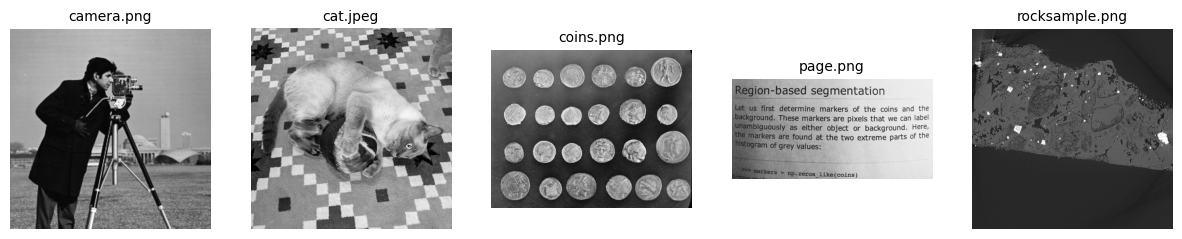

In [3]:
import matplotlib.pyplot as plt
import os

image_paths = []

for dirname, _, filenames in os.walk('./Images'):
    for filename in filenames:
        image_paths.append(os.path.join(dirname, filename))

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for ax, image_path in zip(axes, image_paths):
    img = plt.imread(image_path)           
    ax.imshow(img, cmap='gray')            
    ax.axis('off')                         
    ax.set_title(os.path.basename(image_path), fontsize=10) 

plt.show()


In [4]:
import cv2
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_kmeans_segmentation(image_path, n_clusters_list):
    """
    Apply k-means clustering to segment an image and display the results.

    Parameters:
    - image_path (str): Path to the grayscale image.
    - n_clusters_list (list): List of cluster numbers to use for segmentation.

    Returns:
    - None
    """
    def km_clust(array, n_clusters):
        X = array.reshape((-1, 1))
        k_m = cluster.KMeans(n_clusters=n_clusters, n_init=4)
        k_m.fit(X)
        values = k_m.cluster_centers_.squeeze()
        labels = k_m.labels_
        return values, labels

    img = cv2.imread(image_path, 0)

    fig, axes = plt.subplots(1, len(n_clusters_list) + 1, figsize=(20, 5))

    # Plot original image
    axes[0].imshow(img, cmap=plt.cm.gray)
    axes[0].set_title(f"Original Image: {os.path.basename(image_path)}", fontsize=15)
    axes[0].axis('off')

    # Loop through n_clusters and segment the image
    for i, n_clusters in enumerate(n_clusters_list):
        # Apply k-means clustering
        values, labels = km_clust(img, n_clusters)

        # Create the segmented image
        img_segm = np.choose(labels, values).reshape(img.shape)

        # Plot the segmented image
        axes[i + 1].imshow(img_segm)
        axes[i + 1].set_title(f"n_clusters = {n_clusters}", fontsize=15)
        axes[i + 1].axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

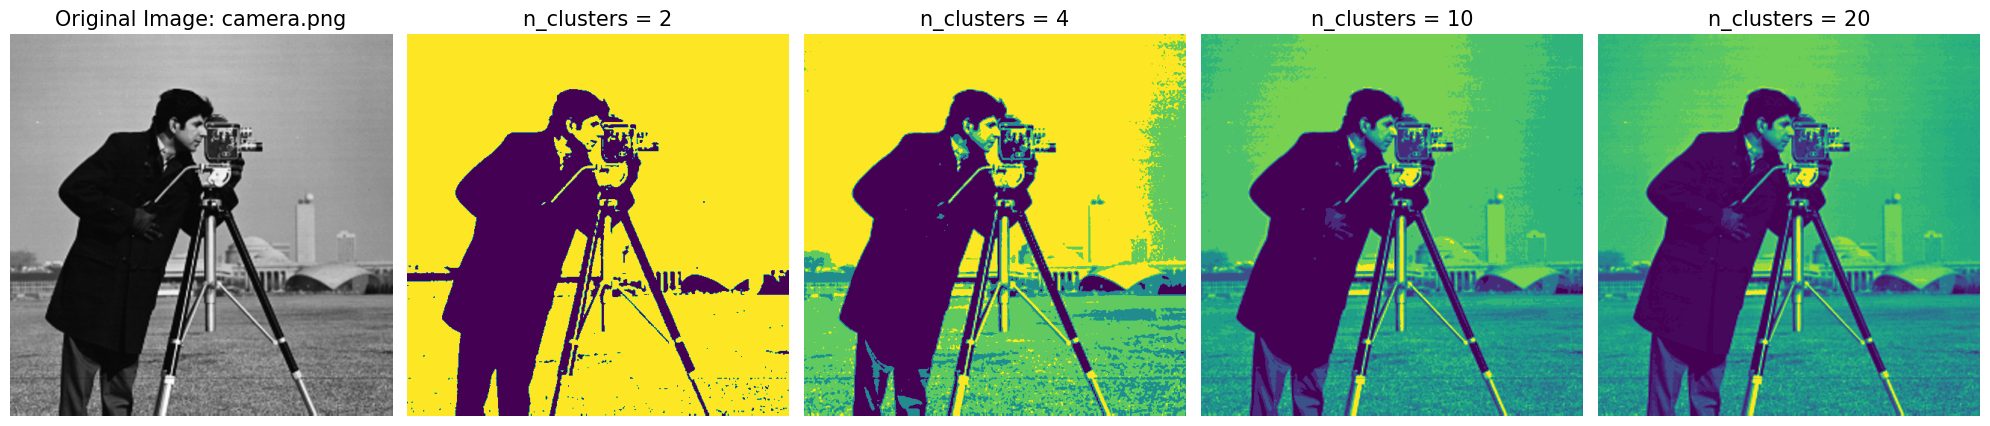

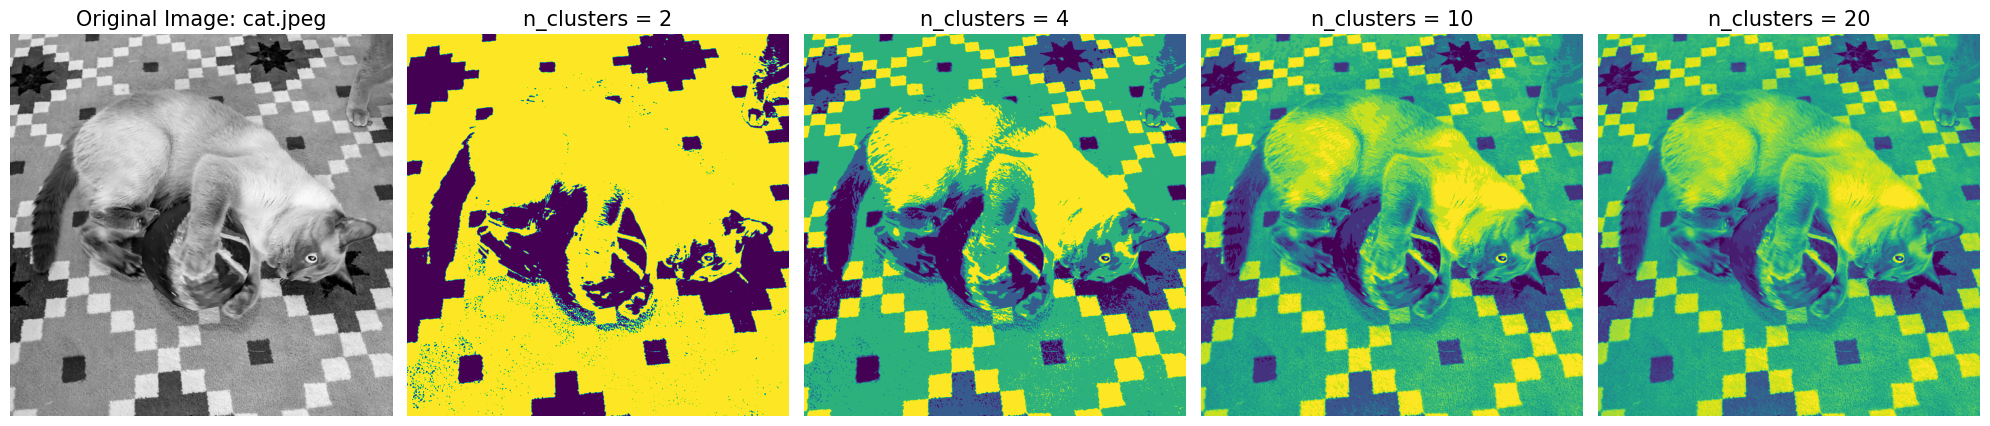

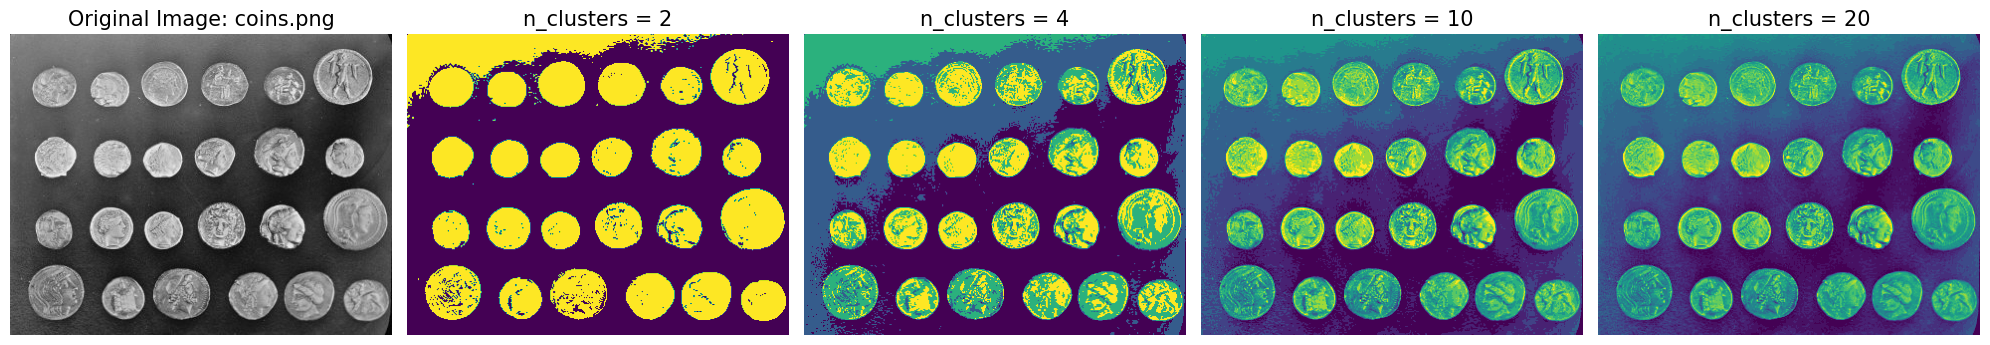

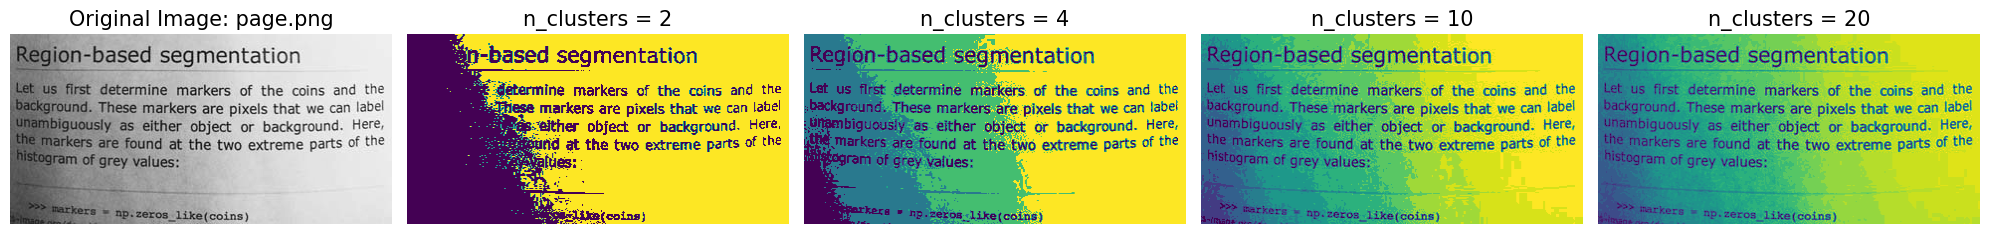

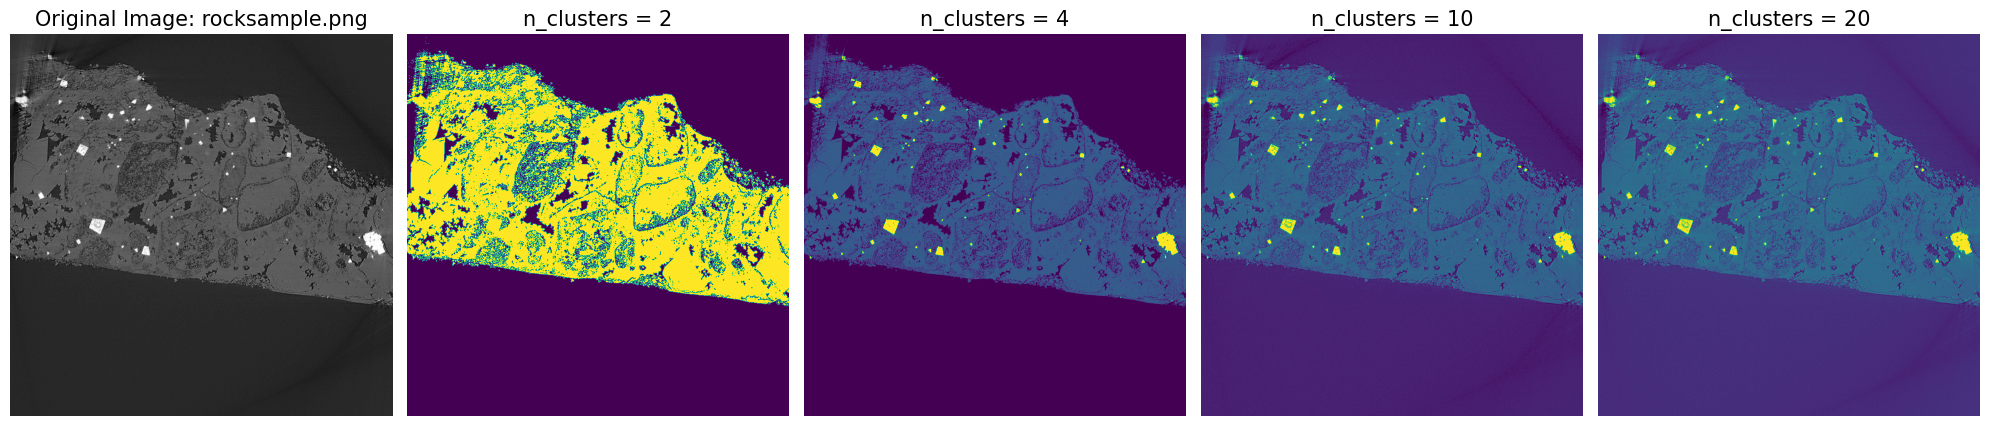

In [5]:
n_clusters_list = [2, 4, 10, 20]       
for number in image_paths:
    plot_kmeans_segmentation(number, n_clusters_list)


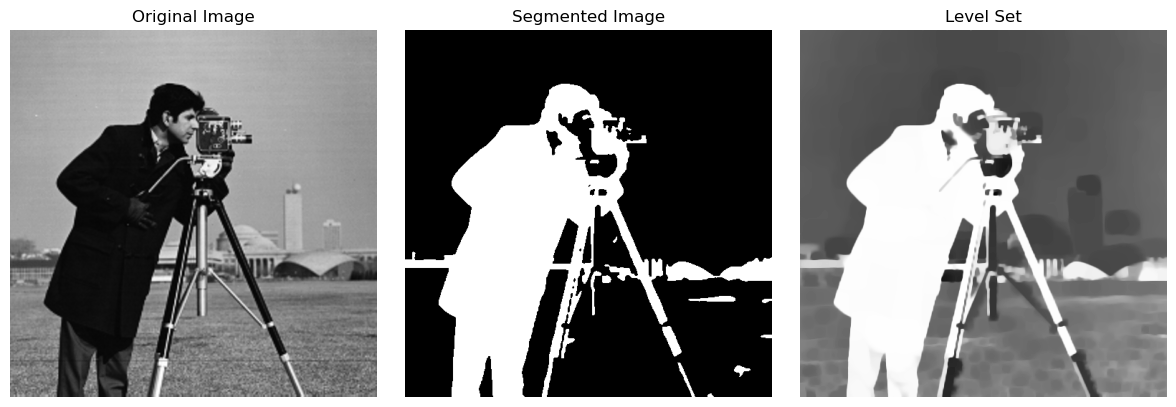

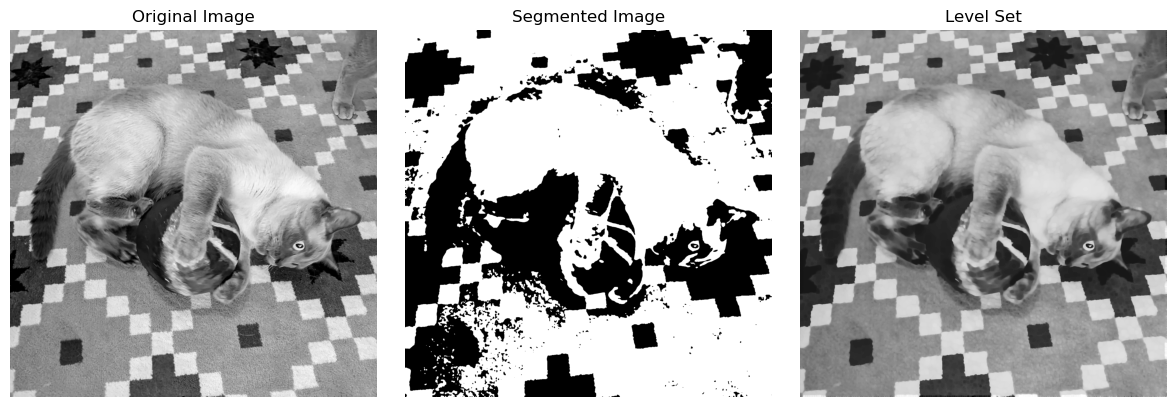

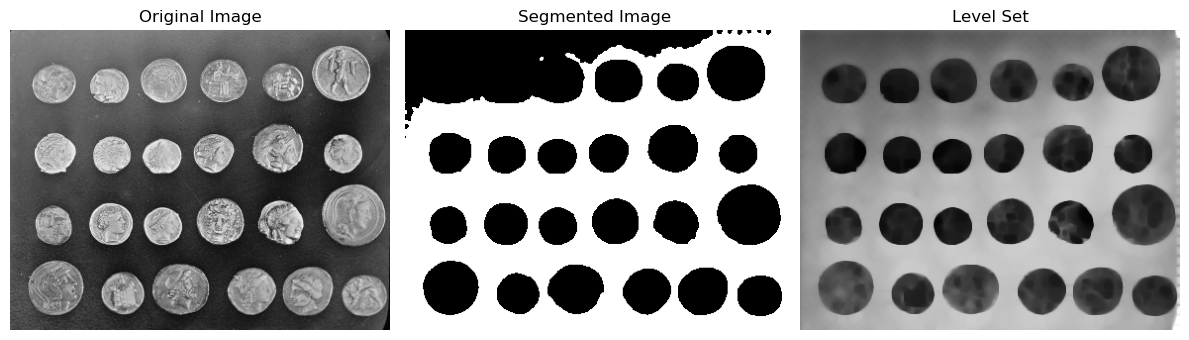

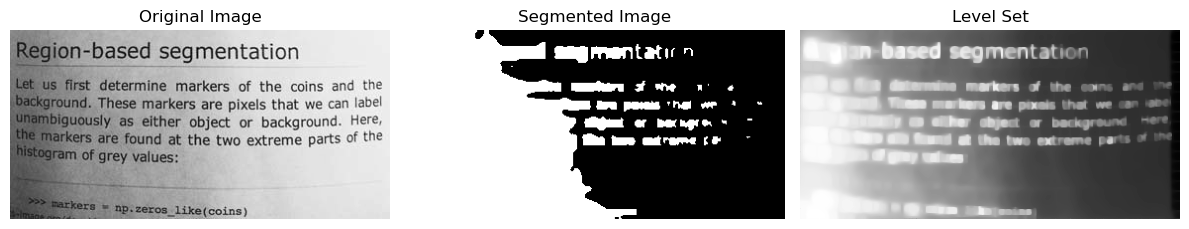

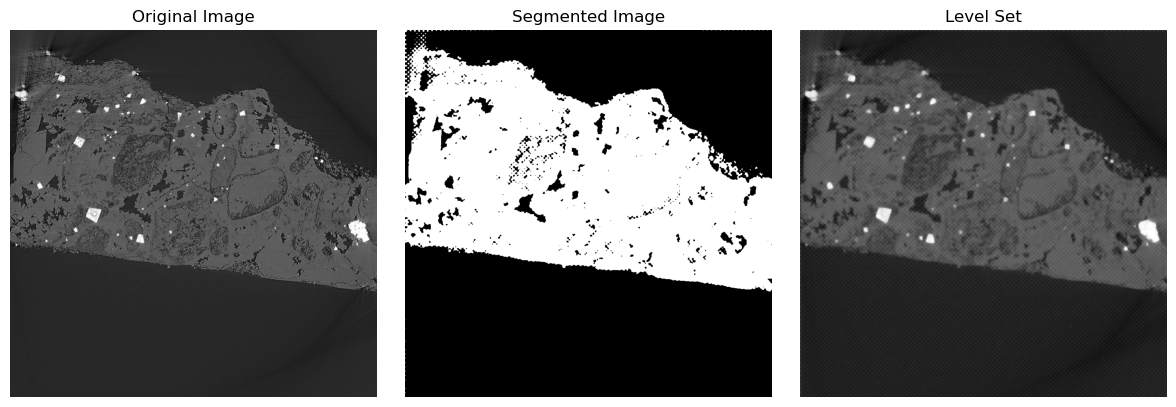

In [8]:
# implement Chan-Vese segmentation on the same images
from skimage.segmentation import chan_vese

def chan_vese_segmentation(image_path):
    cv_result = chan_vese(image_path, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_num_iter=200, dt=0.5, init_level_set="checkerboard", extended_output=True)
    # Plot the results
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    ax = axes.flatten()

    ax[0].imshow(image_gray, cmap="gray")
    ax[0].set_title("Original Image")

    ax[1].imshow(cv_result[0], cmap="gray")
    ax[1].set_title("Segmented Image")

    ax[2].imshow(cv_result[1], cmap="gray")
    ax[2].set_title("Level Set")

    for a in ax:
        a.axis("off")

    plt.tight_layout()
    plt.show()

for number in image_paths:
    image_gray = cv2.imread(number, 0)
    chan_vese_segmentation(image_gray)